#                                           Human Breast Cancer Dataset

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Data

In [2]:
cancer = pd.read_csv('HumanBreastCancer_data_set.csv')

In [3]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

# Data Visualization

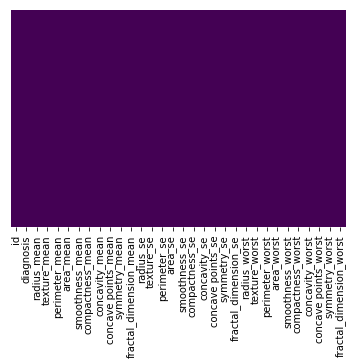

In [5]:
sns.heatmap(cancer.isnull(),yticklabels=False,cbar=False,cmap='viridis') #There are no null values in any column

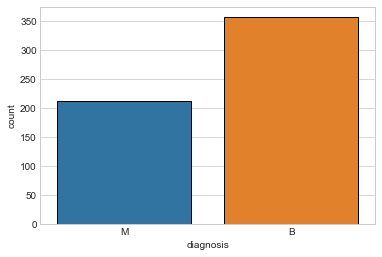

In [6]:
sns.set_style(style = 'whitegrid')
sns.countplot(x = 'diagnosis',data = cancer,ec='black') # There are 212 Patients detected 'Malignant' and 357 'Benign'

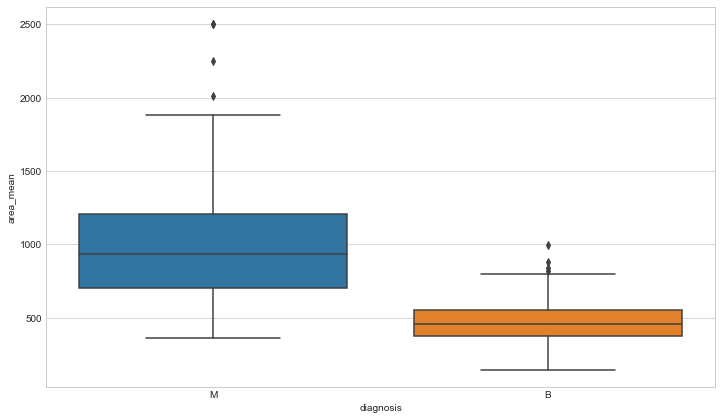

In [7]:
plt.figure(figsize=(12,7))
sns.set_style(style = 'whitegrid')
sns.boxplot(x='diagnosis',y='area_mean',data=cancer) 
plt.show() # Mean Area for the cells detected Malignant is 900 whereas that for Benign is 400

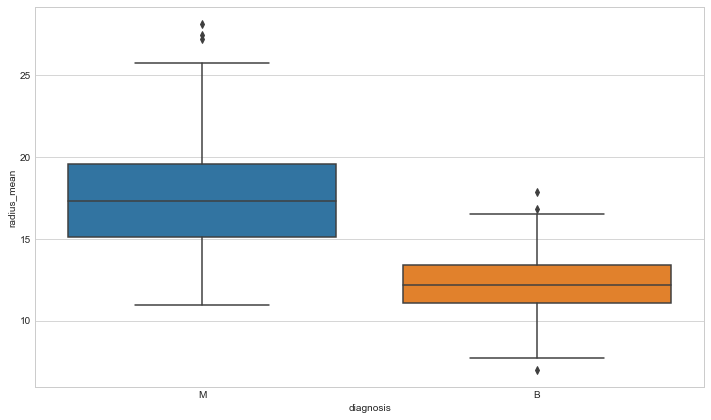

In [8]:
plt.figure(figsize=(12,7))
sns.set_style(style = 'whitegrid')
sns.boxplot(x='diagnosis',y='radius_mean',data=cancer)
plt.show() # Mean Radius for the cells detected Malignant is 17 whereas that for Benign is 13

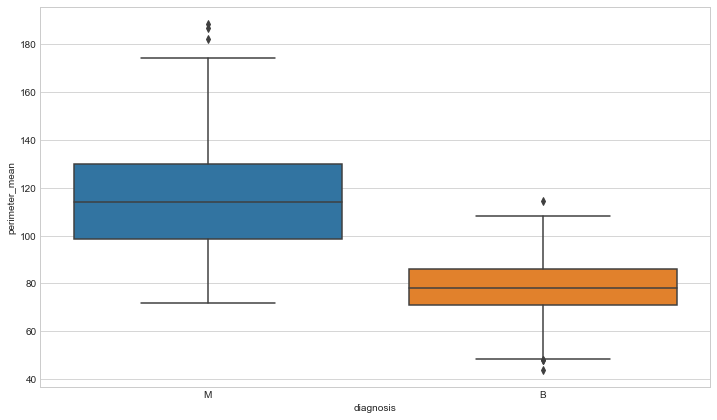

In [9]:
plt.figure(figsize=(12,7))
sns.set_style(style = 'whitegrid')
sns.boxplot(x='diagnosis',y='perimeter_mean',data=cancer)
plt.show() # Mean Perimeter for the cells detected Malignant is 115 whereas that for Benign is 78

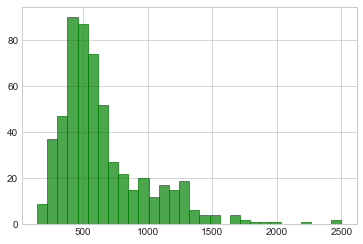

In [10]:
plt.hist(x=cancer['area_mean'].dropna(),bins=30,color='green',alpha = 0.7,ec='green')
plt.show() #There are maximum number of patients whose mean cell area is close to 500

# Converting Categorical Features

In [11]:
diagnosis = pd.get_dummies(cancer['diagnosis'],drop_first=True)

In [12]:
cancer.drop(['diagnosis','id'],axis=1,inplace=True)

In [13]:
cancer = pd.concat([cancer,diagnosis],axis=1)

In [14]:
cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [15]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 

# Building an SVM Model

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = cancer.drop(['M'],axis=1)
y = cancer['M']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [18]:
from sklearn.svm import SVC

In [19]:
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Predictions and Grid Search

In [20]:
predictions = model.predict(X_test)

In [21]:
param_grid = {'C': [0.01,0.1,1, 10, 100, 1000], 'gamma': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV]  C=0.01, gamma=10, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV]  C=0.01, gamma=10, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV]  C=0.01, gamma=10, kernel=rbf, score=0.6363636363636364, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.6363636363636364, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.6363636363636364, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.6363636363636364, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, 

[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.9323308270676691, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.9699248120300752, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.9621212121212122, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV]  C=100, gamma=10, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV]  C=100, gamma=10, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV]  C=100, gamma=10, kernel=rbf, score=0.6363636363636364, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ............

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    2.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [24]:
grid.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [25]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
grid_predictions = grid.predict(X_test)

# Evaluation

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
Matrix = confusion_matrix(y_test,grid_predictions)
print(Matrix)

[[102   3]
 [  6  60]]


In [29]:
correct = sum(Matrix.diagonal())
print("Sum of TP and TN is", correct)

total = sum(sum(Matrix))
print("Total sum is", total)

Sum of TP and TN is 162
Total sum is 171


In [30]:
Accuracy = correct/total
print("Accuracy of the model is", round(Accuracy*100,2), "%")

Accuracy of the model is 94.74 %
